### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 7

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Коняева Марина Александровна
##### Группа:   НФИбд-01-21

## Москва 2024
***

## Вариант № 4

1. Cчитайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов и столбец с откликом (зависимой переменной).

Automobile Data Set 

Название файла: imports-85.data 

Класс: symboling (столбец No 1)

Зависимая переменная: price (столбец No 26) 

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [278]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
data = pd.read_csv(url, header=None)
data = data.rename(columns={0: "class"})
data = data.rename(columns={25: "price"})
data

,class,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


2. Преобразуйте в числовые признаки неправильно распознанные признаки с числовыми значениями. Если в столбцах с метками классов и откликом имеются пропущенные значения, то удалите записи с пропущенными значениями. Оставьте в наборе данных только числовые признаки.

In [279]:
# среди меток класса отсуствуют пропущенные значения
data['class'].isnull().sum(axis=0)

0

In [280]:
# пропущенных значений в откликах не обнаружено 
data['price'].isnull().sum(axis=0)

0

In [281]:
data.replace('?', np.nan, inplace=True)  
data = data.apply(pd.to_numeric, errors='ignore') 
data

,class,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [282]:
# проверим категориальные признаки
data.dtypes

class      int64
1        float64
2         object
3         object
4         object
5         object
6         object
7         object
8         object
9        float64
10       float64
11       float64
12       float64
13         int64
14        object
15        object
16         int64
17        object
18       float64
19       float64
20       float64
21       float64
22       float64
23         int64
24         int64
price    float64
dtype: object

In [283]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {} # экземпляр LabelEncoder для каждого категориального столбца
categorical_columns = [2,3,4,5,6,7,8,14,15,17]

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [284]:
# теперь категориальные значения закодированы числовыми значениями
data.dtypes

class      int64
1        float64
2          int32
3          int32
4          int32
5          int32
6          int32
7          int32
8          int32
9        float64
10       float64
11       float64
12       float64
13         int64
14         int32
15         int32
16         int64
17         int32
18       float64
19       float64
20       float64
21       float64
22       float64
23         int64
24         int64
price    float64
dtype: object

In [285]:
data

,class,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,price
0,3,NaN,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,21,1,0,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,21,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,21,1,0,0,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,21,0,1,0,3,2,0,109.1,...,145,3,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


3. Если в наборе данных остались пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если пропущенные значения в наборе данных отсутствуют, то определите и удалите точки с выбросами в соответствии с методом, указанным в индивидуальном задании. Выберите параметры методов таким образом, чтобы выбросы составляли не менее 5% всех точек набора данных.

Метод обработки пропущенных значений – среднее значение класса 

In [286]:
for col in data.columns[:205]:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# замена NaN на средние значения для каждого класса
for col in data.columns[:205]:
    data[col].fillna(data[col].mean(), inplace=True) 
    
data

,class,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,price
0,3,122.0,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,21,1,0,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,21,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,21,1,0,0,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,21,0,1,0,3,2,0,109.1,...,145,3,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


4. Масштабируйте признаки набора данных на интервал [0, 1]. Используя метод снижения размерности данных, указанный в индивидуальном задании, оставьте в наборе данных три признака (кроме метки класса и откликов), принимающих более 50 различных значений.

In [287]:
from sklearn import preprocessing

data_new = data.to_numpy()

min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(data_new)
data_scaled

array([[1.        , 0.29842932, 0.        , ..., 0.22222222, 0.28947368,
        0.20795889],
       [1.        , 0.29842932, 0.        , ..., 0.22222222, 0.28947368,
        0.28255797],
       [0.6       , 0.29842932, 0.        , ..., 0.16666667, 0.26315789,
        0.28255797],
       ...,
       [0.2       , 0.15706806, 1.        , ..., 0.13888889, 0.18421053,
        0.40631051],
       [0.2       , 0.15706806, 1.        , ..., 0.36111111, 0.28947368,
        0.43076312],
       [0.2       , 0.15706806, 1.        , ..., 0.16666667, 0.23684211,
        0.43461099]])

In [288]:
my_new_data = pd.DataFrame(data_scaled)
my_new_data.rename(columns={25: 'price'}, inplace=True)

X = my_new_data[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]].to_numpy()
y = data['class'].to_numpy()

Метод снижения размерности данных – линейная регрессия (LinearRegression) 

In [289]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [290]:
abs(lin_reg.coef_)

array([2.11085677, 0.00555121, 1.51327252, 0.29701467, 1.22334303,
       1.40867997, 0.65170727, 0.69016632, 4.55531937, 0.88856783,
       1.87348121, 0.38230396, 0.18902398, 0.54096301, 1.19292356,
       1.2376789 , 0.55954701, 0.28220886, 0.15120717, 1.76390934,
       3.11898239, 0.11090761, 2.95780718, 1.63046373])

In [291]:
coefficients = np.array(abs(lin_reg.coef_))
sorted_indices = np.argsort(coefficients)
top_3_indices = sorted_indices[-3:]
top_3_values = coefficients[top_3_indices]
top_3_values

array([2.95780718, 3.11898239, 4.55531937])

In [292]:
top_3_indices

array([22, 20,  8], dtype=int64)

In [293]:
my_data3 = my_new_data[[21,19,7,'price']].join(data['class'])
my_data3

,21,19,7,price,class
0,0.262500,0.290476,1.0,0.207959,3
1,0.262500,0.290476,1.0,0.282558,3
2,0.441667,0.666667,1.0,0.282558,1
3,0.225000,0.633333,0.5,0.219254,2
4,0.279167,0.633333,0.0,0.306142,2
...,...,...,...,...,...
200,0.275000,0.514286,1.0,0.291123,-1
201,0.466667,0.514286,1.0,0.345738,-1
202,0.358333,0.380952,1.0,0.406311,-1
203,0.241667,0.633333,1.0,0.430763,-1


5. Визуализируйте набор данных в виде точек в трехмерном пространстве, отображая точки разных классов разными цветами. В качестве подписей осей используйте названия признаков. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

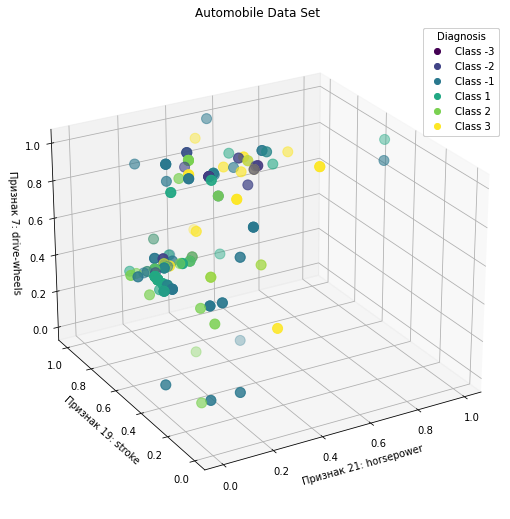

In [294]:
from mpl_toolkits import mplot3d
%matplotlib inline

fig = plt.figure(figsize=(12,9))
ax = plt.axes(projection='3d')

xs = my_data3[21].to_numpy()
ys = my_data3[19].to_numpy()
zs = my_data3[7].to_numpy()
scatter = ax.scatter( xs, ys, zs, c=my_data3['class'],s=100)
# Создаем легенду с подписями точек
legend1 = ax.legend(*scatter.legend_elements(), title="Diagnosis")
ax.add_artist(legend1)

# Устанавливаем подписи для классов
legend1.get_texts()[0].set_text("Class -3")
legend1.get_texts()[1].set_text("Class -2")
legend1.get_texts()[2].set_text("Class -1")
legend1.get_texts()[3].set_text("Class 1")
legend1.get_texts()[4].set_text("Class 2")
legend1.get_texts()[5].set_text("Class 3")
ax.add_artist(legend1)
ax.set_xlabel('Признак 21: horsepower')
ax.set_ylabel('Признак 19: stroke')
ax.set_zlabel('Признак 7: drive-wheels')
ax.set_title('Automobile Data Set ')
ax.view_init( azim=-120, elev=25 );

6. Разбейте набор данных на обучающую и тестовую выборки. Постройте регрессоры на базе моделей регрессии, указанных в индивидуальном задании, для каждого из трех признаков. Определите оптимальные параметры регрессоров при помощи GridSearchCV.

Регрессоры: 

⁃               Полиномиальная регрессия (PolynomialFeatures+LinearRegression), параметр degree в диапазоне от 2 до 5 

⁃               гребневая регрессия (Ridge), параметр alpha в диапазоне от 0.1 до 1 

⁃               регрессии на основе метода опорных векторов (SVR), параметр degree в диапазоне от 1 до 5 

In [295]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Функция для вычисления MSPE
def mean_squared_percentage_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2 / (y_true ** 2 + 1e-10))  # добавляем маленькую константу для избежания деления на ноль

# Предсказания для каждого из регрессоров
mspe1 = mean_squared_percentage_error(y_test, pol_pred1)  # Полиномиальная регрессия
mspe2 = mean_squared_percentage_error(y_test, ridge_pred1)  # Ridge регрессия
mspe3 = mean_squared_percentage_error(y_test, svr_pred1)    # SVR

# Вывод значений MSPE
print(f'MSPE Полиномиальная регрессия: {mspe1}')
print(f'MSPE Ridge: {mspe2}')
print(f'MSPE SVR: {mspe3}')

# Определение победителя
if mspe1 < mspe2 and mspe1 < mspe3:
    best_regressor = "Полиномиальная регрессия"
    best_mspe = mspe1
elif mspe2 < mspe1 and mspe2 < mspe3:
    best_regressor = "Ridge"
    best_mspe = mspe2
else:
    best_regressor = "SVR"
    best_mspe = mspe3

print(f'Лучший регрессор: {best_regressor} с MSPE = {best_mspe}')


MSPE Полиномиальная регрессия: 2335745318.223723
MSPE Ridge: 2330700497.131721
MSPE SVR: 1790029142.5450218
Лучший регрессор: SVR с MSPE = 1790029142.5450218


In [296]:
XX = my_data3[[21,19,7]].to_numpy()
Y = my_data3['class'].to_numpy()
XX.shape, Y.shape

((205, 3), (205,))

In [297]:
X_train, X_test, y_train, y_test = my_train_test_split(XX, Y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((144, 3), (144,), (61, 3), (61,))

Полиномиальная регрессия (PolynomialFeatures+LinearRegression), параметр degree в диапазоне от 2 до 5

In [298]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

def PolynomialRegression(degree=2):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

param_grid = [
    {
        "poly__degree": [i for i in range(2, 6)]
    }
]

# Признак 1: Polynomial Regression для 1-го признака
poly_reg1 = PolynomialRegression()
poly_grid_search1 = GridSearchCV(poly_reg1, param_grid)
poly_grid_search1.fit(X_train[:, 0].reshape(-1, 1), y_train)
pol_pred1 = poly_grid_search1.predict(X_test[:, 0].reshape(-1, 1))
print(f"Лучшие параметры для полиномиальной регрессии (признак 1): {poly_grid_search1.best_params_}")

# Признак 2: Polynomial Regression для 2-го признака
poly_reg2 = PolynomialRegression()
poly_grid_search2 = GridSearchCV(poly_reg2, param_grid)
poly_grid_search2.fit(X_train[:, 1].reshape(-1, 1), y_train)
pol_pred2 = poly_grid_search2.predict(X_test[:, 1].reshape(-1, 1))
print(f"Лучшие параметры для полиномиальной регрессии (признак 2): {poly_grid_search2.best_params_}")

# Признак 3: Polynomial Regression для 3-го признака
poly_reg3 = PolynomialRegression()
poly_grid_search3 = GridSearchCV(poly_reg3, param_grid)
poly_grid_search3.fit(X_train[:, 2].reshape(-1, 1), y_train)
pol_pred3 = poly_grid_search3.predict(X_test[:, 2].reshape(-1, 1))
print(f"Лучшие параметры для полиномиальной регрессии (признак 3): {poly_grid_search3.best_params_}")

Лучшие параметры для полиномиальной регрессии (признак 1): {'poly__degree': 2}
Лучшие параметры для полиномиальной регрессии (признак 2): {'poly__degree': 3}
Лучшие параметры для полиномиальной регрессии (признак 3): {'poly__degree': 2}


Гребневая регрессия (Ridge), параметр alpha в диапазоне от 0.1 до 1

In [299]:
from sklearn.linear_model import Ridge

def RidgeRegression(alpha=1.0):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))
    ])

param_grid_ridge = [
    {
        "ridge_reg__alpha": [i / 10 for i in range(1, 11)]  # alpha от 0.1 до 1
    }
]

# Признак 1: Ridge для 1-го признака
ridge_reg1 = RidgeRegression()
ridge_grid_search1 = GridSearchCV(ridge_reg1, param_grid_ridge)
ridge_grid_search1.fit(X_train[:, 0].reshape(-1, 1), y_train)
ridge_pred1 = ridge_grid_search1.predict(X_test[:, 0].reshape(-1, 1))
print(f"Лучшие параметры для Ridge регрессии (признак 1): {ridge_grid_search1.best_params_}")

# Признак 2: Ridge для 2-го признака
ridge_reg2 = RidgeRegression()
ridge_grid_search2 = GridSearchCV(ridge_reg2, param_grid_ridge)
ridge_grid_search2.fit(X_train[:, 1].reshape(-1, 1), y_train)
ridge_pred2 = ridge_grid_search2.predict(X_test[:, 1].reshape(-1, 1))
print(f"Лучшие параметры для Ridge регрессии (признак 2): {ridge_grid_search2.best_params_}")

# Признак 3: Ridge для 3-го признака
ridge_reg3 = RidgeRegression()
ridge_grid_search3 = GridSearchCV(ridge_reg3, param_grid_ridge)
ridge_grid_search3.fit(X_train[:, 2].reshape(-1, 1), y_train)
ridge_pred3 = ridge_grid_search3.predict(X_test[:, 2].reshape(-1, 1))
print(f"Лучшие параметры для Ridge регрессии (признак 3): {ridge_grid_search3.best_params_}")


Лучшие параметры для Ridge регрессии (признак 1): {'ridge_reg__alpha': 1.0}
Лучшие параметры для Ridge регрессии (признак 2): {'ridge_reg__alpha': 1.0}
Лучшие параметры для Ridge регрессии (признак 3): {'ridge_reg__alpha': 1.0}


Регрессии на основе метода опорных векторов (SVR), параметр degree в диапазоне от 1 до 5

In [300]:
from sklearn.svm import SVR

def SVRRegression(degree=3):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("svr", SVR(degree=degree))
    ])

param_grid_svr = [
    {
        "svr__degree": [i for i in range(1, 6)]  # degree от 1 до 5
    }
]

# Признак 1: SVR для 1-го признака
svr_reg1 = SVRRegression()
svr_grid_search1 = GridSearchCV(svr_reg1, param_grid_svr)
svr_grid_search1.fit(X_train[:, 0].reshape(-1, 1), y_train)
svr_pred1 = svr_grid_search1.predict(X_test[:, 0].reshape(-1, 1))
print(f"Лучшие параметры для SVR регрессии (признак 1): {svr_grid_search1.best_params_}")

# Признак 2: SVR для 2-го признака
svr_reg2 = SVRRegression()
svr_grid_search2 = GridSearchCV(svr_reg2, param_grid_svr)
svr_grid_search2.fit(X_train[:, 1].reshape(-1, 1), y_train)
svr_pred2 = svr_grid_search2.predict(X_test[:, 1].reshape(-1, 1))
print(f"Лучшие параметры для SVR регрессии (признак 2): {svr_grid_search2.best_params_}")

# Признак 3: SVR для 3-го признака
svr_reg3 = SVRRegression()
svr_grid_search3 = GridSearchCV(svr_reg3, param_grid_svr)
svr_grid_search3.fit(X_train[:, 2].reshape(-1, 1), y_train)
svr_pred3 = svr_grid_search3.predict(X_test[:, 2].reshape(-1, 1))
print(f"Лучшие параметры для SVR регрессии (признак 3): {svr_grid_search3.best_params_}")


Лучшие параметры для SVR регрессии (признак 1): {'svr__degree': 1}
Лучшие параметры для SVR регрессии (признак 2): {'svr__degree': 1}
Лучшие параметры для SVR регрессии (признак 3): {'svr__degree': 1}


7. Для каждого из трех признаков визуализируйте на плоскости набор данных одним цветом и линии регрессии для регрессоров с оптимальными параметрами, определенными в п. 6 (всего три рисунка). Регрессоры, имеющие максимальное значение показателя качества регрессии, указанного в индивидуальном задании, выделите красным цветом. В качестве подписи оси X используйте название признака, в качестве подписи оси Y – название столбца с откликами. Создайте легенду для линий регрессии.

Показатели качества регрессии: 

⁃               Для определения лучшего регрессора MSPE  (Ridge Regression)

In [301]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Функция для вычисления MSPE
def mean_squared_percentage_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2 / (y_true ** 2 + 1e-10))  # добавляем маленькую константу для избежания деления на ноль

# Предсказания для каждого из регрессоров
mspe1 = mean_squared_percentage_error(y_test, pol_pred1)  # Полиномиальная регрессия
mspe2 = mean_squared_percentage_error(y_test, ridge_pred1)  # Ridge регрессия
mspe3 = mean_squared_percentage_error(y_test, svr_pred1)    # SVR

# Вывод значений MSPE
print(f'MSPE Полиномиальная регрессия: {mspe1}')
print(f'MSPE Ridge: {mspe2}')
print(f'MSPE SVR: {mspe3}')

# Определение победителя
if mspe1 < mspe2 and mspe1 < mspe3:
    best_regressor = "Полиномиальная регрессия"
    best_mspe = mspe1
elif mspe2 < mspe1 and mspe2 < mspe3:
    best_regressor = "Ridge"
    best_mspe = mspe2
else:
    best_regressor = "SVR"
    best_mspe = mspe3

print(f'Лучший регрессор: {best_regressor} с MSPE = {best_mspe}')


MSPE Полиномиальная регрессия: 1739291700.099012
MSPE Ridge: 1770669917.614704
MSPE SVR: 1542379861.7878563
Лучший регрессор: SVR с MSPE = 1542379861.7878563


In [302]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Функция для вычисления MSPE
def mean_squared_percentage_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2 / (y_true ** 2 + 1e-10))  # добавляем маленькую константу для избежания деления на ноль

# Предсказания для каждого из регрессоров
mspe1 = mean_squared_percentage_error(y_test, pol_pred2)  # Полиномиальная регрессия
mspe2 = mean_squared_percentage_error(y_test, ridge_pred2)  # Ridge регрессия
mspe3 = mean_squared_percentage_error(y_test, svr_pred2)    # SVR

# Вывод значений MSPE
print(f'MSPE Полиномиальная регрессия: {mspe1}')
print(f'MSPE Ridge: {mspe2}')
print(f'MSPE SVR: {mspe3}')

# Определение победителя
if mspe1 < mspe2 and mspe1 < mspe3:
    best_regressor = "Полиномиальная регрессия"
    best_mspe = mspe1
elif mspe2 < mspe1 and mspe2 < mspe3:
    best_regressor = "Ridge"
    best_mspe = mspe2
else:
    best_regressor = "SVR"
    best_mspe = mspe3

print(f'Лучший регрессор: {best_regressor} с MSPE = {best_mspe}')


MSPE Полиномиальная регрессия: 2152751079.2416434
MSPE Ridge: 1709303243.7524824
MSPE SVR: 1042187175.6892692
Лучший регрессор: SVR с MSPE = 1042187175.6892692


In [303]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Функция для вычисления MSPE
def mean_squared_percentage_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2 / (y_true ** 2 + 1e-10))  # добавляем маленькую константу для избежания деления на ноль

# Предсказания для каждого из регрессоров
mspe1 = mean_squared_percentage_error(y_test, pol_pred3)  # Полиномиальная регрессия
mspe2 = mean_squared_percentage_error(y_test, ridge_pred3)  # Ridge регрессия
mspe3 = mean_squared_percentage_error(y_test, svr_pred3)    # SVR

# Вывод значений MSPE
print(f'MSPE Полиномиальная регрессия: {mspe1}')
print(f'MSPE Ridge: {mspe2}')
print(f'MSPE SVR: {mspe3}')

# Определение победителя
if mspe1 < mspe2 and mspe1 < mspe3:
    best_regressor = "Полиномиальная регрессия"
    best_mspe = mspe1
elif mspe2 < mspe1 and mspe2 < mspe3:
    best_regressor = "Ridge"
    best_mspe = mspe2
else:
    best_regressor = "SVR"
    best_mspe = mspe3

print(f'Лучший регрессор: {best_regressor} с MSPE = {best_mspe}')


MSPE Полиномиальная регрессия: 1705379750.5775392
MSPE Ridge: 1818538280.20106
MSPE SVR: 1208983818.9269254
Лучший регрессор: SVR с MSPE = 1208983818.9269254


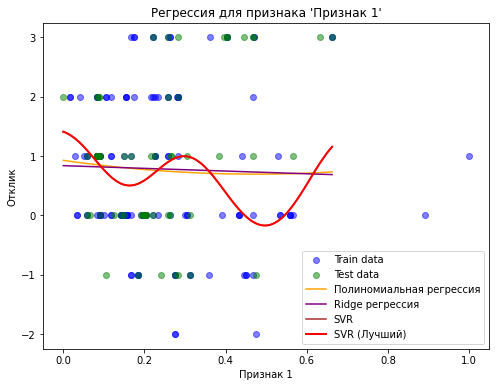

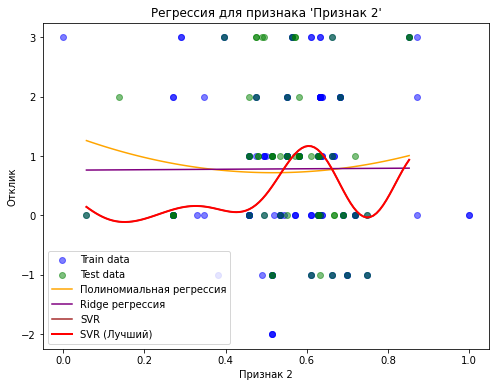

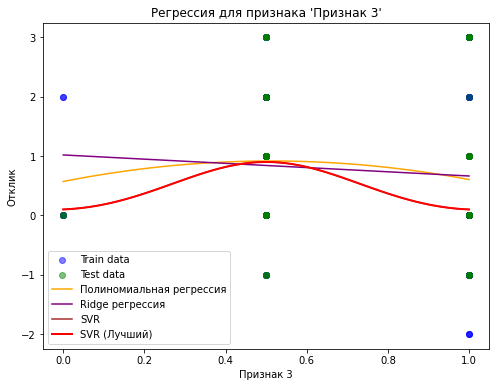

In [304]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Функция для вычисления MSPE
def mean_squared_percentage_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2 / (y_true ** 2 + 1e-10))

# Предсказания для каждого из регрессоров
mspe_results = {}
predictions = {
    'Polynomial': [pol_pred1, pol_pred2, pol_pred3],
    'Ridge': [ridge_pred1, ridge_pred2, ridge_pred3],
    'SVR': [svr_pred1, svr_pred2, svr_pred3]
}

# Вычисляем MSPE для всех регрессоров и сохраняем результаты
for regressor, preds in predictions.items():
    mspe_results[regressor] = [mean_squared_percentage_error(y_test, pred) for pred in preds]

# Определяем лучший регрессор для каждого признака
best_regressors = {}
for i in range(3):
    best_regressor = min(mspe_results, key=lambda x: mspe_results[x][i])
    best_regressors[i] = best_regressor

# Визуализация для каждого признака
features = ['Признак 1', 'Признак 2', 'Признак 3']  # Названия признаков
y_label = "Отклик"  # Название столбца с откликами

for i in range(3):
    plt.figure(figsize=(8, 6))
    
    # Визуализация исходных данных
    plt.scatter(X_train[:, i], y_train, color='blue', label="Train data", alpha=0.5)
    plt.scatter(X_test[:, i], y_test, color='green', label="Test data", alpha=0.5)

    # Линии регрессий для каждого регрессора
    x_range = np.linspace(min(X_test[:, i]), max(X_test[:, i]), 100).reshape(-1, 1)
    
    # Полиномиальная регрессия
    poly_model = PolynomialRegression(degree=poly_grid_search1.best_params_["poly__degree"])
    poly_model.fit(X_train[:, i].reshape(-1, 1), y_train)
    poly_pred = poly_model.predict(x_range)
    
    # Гребневая регрессия (Ridge)
    ridge_model = RidgeRegression(alpha=ridge_grid_search1.best_params_["ridge_reg__alpha"])
    ridge_model.fit(X_train[:, i].reshape(-1, 1), y_train)
    ridge_pred = ridge_model.predict(x_range)
    
    # Метод опорных векторов (SVR)
    svr_model = SVRRegression(degree=svr_grid_search1.best_params_["svr__degree"])
    svr_model.fit(X_train[:, i].reshape(-1, 1), y_train)
    svr_pred = svr_model.predict(x_range)

    # Отображение линий регрессии
    plt.plot(x_range, poly_pred, label="Полиномиальная регрессия", color="orange")
    plt.plot(x_range, ridge_pred, label="Ridge регрессия", color="purple")
    plt.plot(x_range, svr_pred, label="SVR", color="brown")

    # Выделение лучшего регрессора
    if best_regressors[i] == "Polynomial":
        plt.plot(x_range, poly_pred, label="Полиномиальная регрессия (Лучший)", color="red", linewidth=2)
    elif best_regressors[i] == "Ridge":
        plt.plot(x_range, ridge_pred, label="Ridge регрессия (Лучший)", color="red", linewidth=2)
    else:
        plt.plot(x_range, svr_pred, label="SVR (Лучший)", color="red", linewidth=2)

    # Подписи осей и заголовок
    plt.xlabel(features[i])
    plt.ylabel(y_label)
    plt.title(f"Регрессия для признака '{features[i]}'")
    
    # Легенда
    plt.legend()
    
    # Показать график
    plt.show()


8. Постройте на одном рисунке кривые обучения (зависимость показателя качества регрессии, указанного в индивидуальном задании, от количества точек в обучающей выборке) для трех лучших регрессоров для каждого из трех признаков по показателю качества, указанному в индивидуальном задании. Кривые для регрессора с максимальным показателем качества визуализируйте красным цветом (кривую для обучающей выборки сплошной линией, кривую для тестовой выборки линией из точек). Подпишите корректно оси и создайте легенду для кривых обучения.

⁃               Для визуализации кривой обучения MSLE

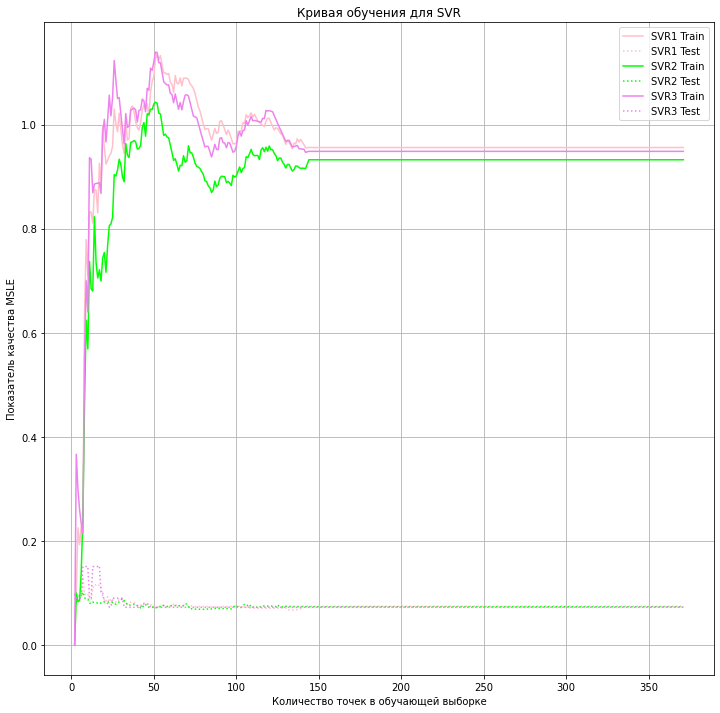

In [318]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Задаем массивы для хранения значений MSLE
train_score_svr1 = []
test_score_svr1 = []
train_score_svr2 = []
test_score_svr2 = []
train_score_svr3 = []
test_score_svr3 = []

# Определяем диапазон для обучения моделей
for i in range(2, 372):
    # Обучаем SVR на соответствующем признаке
    svr_grid_search1.best_estimator_.fit(X_train[:i, 0].reshape(-1, 1), y_train[:i])
    svr_grid_search2.best_estimator_.fit(X_train[:i, 1].reshape(-1, 1), y_train[:i])
    svr_grid_search3.best_estimator_.fit(X_train[:i, 2].reshape(-1, 1), y_train[:i])

    # Предсказываем значения для обучающего набора
    svr_pred1_train = svr_grid_search1.best_estimator_.predict(X_train[:i, 0].reshape(-1, 1))
    svr_pred2_train = svr_grid_search2.best_estimator_.predict(X_train[:i, 1].reshape(-1, 1))
    svr_pred3_train = svr_grid_search3.best_estimator_.predict(X_train[:i, 2].reshape(-1, 1))

    # Вычисляем MAE для обучающего набора
    train_score_svr1.append(mean_absolute_error(y_train[:i], svr_pred1_train))
    train_score_svr2.append(mean_absolute_error(y_train[:i], svr_pred2_train))
    train_score_svr3.append(mean_absolute_error(y_train[:i], svr_pred3_train))

    # Предсказываем значения для тестового набора
    svr_pred1_test = svr_grid_search1.best_estimator_.predict(X_test[:, 0].reshape(-1, 1))
    svr_pred2_test = svr_grid_search2.best_estimator_.predict(X_test[:, 1].reshape(-1, 1))
    svr_pred3_test = svr_grid_search3.best_estimator_.predict(X_test[:, 2].reshape(-1, 1))

    # Сдвигаем значения на +3
    y_train_shifted = y_train + 3
    y_test_shifted = y_test + 3
    svr_pred1_test_shifted = svr_pred1_test + 3
    svr_pred2_test_shifted = svr_pred2_test + 3
    svr_pred3_test_shifted = svr_pred3_test + 3

    # Вычисляем MSLE для тестового набора
    test_score_svr1.append(mean_squared_log_error(y_test_shifted, svr_pred1_test_shifted))
    test_score_svr2.append(mean_squared_log_error(y_test_shifted, svr_pred2_test_shifted))
    test_score_svr3.append(mean_squared_log_error(y_test_shifted, svr_pred3_test_shifted))

# Визуализация кривых обучения
plt.figure(figsize=(12, 12))

plt.plot(range(2, 372), train_score_svr1, c='pink', label="SVR1 Train")
plt.plot(range(2, 372), test_score_svr1, c='pink', linestyle='dotted', label="SVR1 Test")
plt.plot(range(2, 372), train_score_svr2, c='lime', label="SVR2 Train")
plt.plot(range(2, 372), test_score_svr2, c='lime', linestyle='dotted', label="SVR2 Test")
plt.plot(range(2, 372), train_score_svr3, c='violet', label="SVR3 Train")
plt.plot(range(2, 372), test_score_svr3, c='violet', linestyle='dotted', label="SVR3 Test")

plt.legend()
plt.xlabel("Количество точек в обучающей выборке")
plt.ylabel("Показатель качества MSLE")
plt.title("Кривая обучения для SVR")
plt.grid()
plt.show()
